In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [12]:
L=2049  # system size 2**n+1
N=5000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.25, 0.35, 0.001) 
n = int(np.floor(np.log2(L)) - 1)

edge_reach_frac = [] 
ts = [] 
mean_msds = [] 
actives = [] 
passives = [] 

for h in hs:
    filename = 'data_L{}_N{}_p{}_q{}_h{:.3f}.dat'.format(L, N, p, q, h)
    print(filename)
    file = open(filename)
    realisations, moments = read_file(file, verbose=False) 
    
    times = [] 
    msds = [] 
    tot_edge_reach = 0 
    tot_possible_edge = len(realisations)*4 

    for (i, realisation) in enumerate(realisations):

        time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, n)
        times.append(time)
        msds.append(msd)
        tot_edge_reach += np.sum(edge_reach>0)
        
    edge_reach_frac.append(tot_edge_reach/tot_possible_edge)
    t = select_longest(times)[:-1] 
    mean_msd = np.mean(pad(msds), axis=0)
    
    ts.append(t) 
    mean_msds.append(mean_msd)
    
    active_moments, tracer_moments = extract_moments(moments)
    
    actives.append(active_moments)
    passives.append(tracer_moments)

data_L2049_N5000_p0.34_q0.33_h0.250.dat
data_L2049_N5000_p0.34_q0.33_h0.251.dat
data_L2049_N5000_p0.34_q0.33_h0.252.dat
data_L2049_N5000_p0.34_q0.33_h0.253.dat
data_L2049_N5000_p0.34_q0.33_h0.254.dat
data_L2049_N5000_p0.34_q0.33_h0.255.dat
data_L2049_N5000_p0.34_q0.33_h0.256.dat
data_L2049_N5000_p0.34_q0.33_h0.257.dat
data_L2049_N5000_p0.34_q0.33_h0.258.dat
data_L2049_N5000_p0.34_q0.33_h0.259.dat
data_L2049_N5000_p0.34_q0.33_h0.260.dat
data_L2049_N5000_p0.34_q0.33_h0.261.dat
data_L2049_N5000_p0.34_q0.33_h0.262.dat
data_L2049_N5000_p0.34_q0.33_h0.263.dat
data_L2049_N5000_p0.34_q0.33_h0.264.dat
data_L2049_N5000_p0.34_q0.33_h0.265.dat
data_L2049_N5000_p0.34_q0.33_h0.266.dat
data_L2049_N5000_p0.34_q0.33_h0.267.dat
data_L2049_N5000_p0.34_q0.33_h0.268.dat
data_L2049_N5000_p0.34_q0.33_h0.269.dat
data_L2049_N5000_p0.34_q0.33_h0.270.dat
data_L2049_N5000_p0.34_q0.33_h0.271.dat
data_L2049_N5000_p0.34_q0.33_h0.272.dat
data_L2049_N5000_p0.34_q0.33_h0.273.dat
data_L2049_N5000_p0.34_q0.33_h0.274.dat


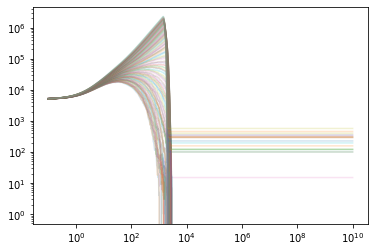

In [29]:
for active_moments in actives: 
    plt.plot(active_moments[:, 0], active_moments[:, 2], alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

In [ ]:
for active_moments in actives: 
    t = active_moments[:, 0]
    sp = active_moments[:, 2]
    sp = sp[sp>0]
    plt.plot(active_moments[:, 0], active_moments[:, 2], alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

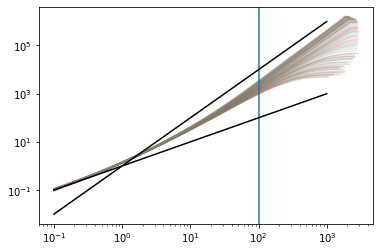

In [9]:
for (t, m) in zip(ts, mean_msds): 
    if len(t) == len(m):
        plt.plot(t, m, alpha=0.2)
plt.axvline(x=1e2)

x = np.array(t)
x = x[x<1e3] 
plt.plot(x, x**2, color='k')
plt.plot(x, x, color='k')
plt.xscale('log')
plt.yscale('log')
plt.show() 

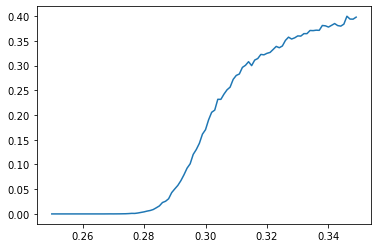

In [10]:
plt.plot(hs, edge_reach_frac)
plt.show() 